## Logistic Regression Model for Divorce Prediction

## Part 1.1: Implement  linear regression from scratch

### Logistic regression
Logistic regression uses an equation as the representation, very much like linear regression.

Input values (x) are combined linearly using weights or coefficient values (referred to as W) to predict an output value (y). A key difference from linear regression is that the output value being modeled is a binary values (0 or 1) rather than a continuous value.<br>

###  $\hat{y}(w, x) = \frac{1}{1+exp^{-(w_0 + w_1 * x_1 + ... + w_p * x_p)}}$

#### Dataset
The dataset is available at <strong>"data/divorce.csv"</strong> in the respective challenge's repo.<br>
<strong>Original Source:</strong> https://archive.ics.uci.edu/ml/datasets/Divorce+Predictors+data+set. Dataset is based on rating for questionnaire filled by people who already got divorse and those who is happily married.<br><br>

[//]: # "The dataset is available at http://archive.ics.uci.edu/ml/machine-learning-databases/00520/data.zip. Unzip the file and use either CSV or xlsx file.<br>"


#### Features (X)
1. Atr1 - If one of us apologizes when our discussion deteriorates, the discussion ends. (Numeric | Range: 0-4)
2. Atr2 - I know we can ignore our differences, even if things get hard sometimes. (Numeric | Range: 0-4)
3. Atr3 - When we need it, we can take our discussions with my spouse from the beginning and correct it. (Numeric | Range: 0-4)
4. Atr4 - When I discuss with my spouse, to contact him will eventually work. (Numeric | Range: 0-4)
5. Atr5 - The time I spent with my wife is special for us. (Numeric | Range: 0-4)
6. Atr6 - We don't have time at home as partners. (Numeric | Range: 0-4)
7. Atr7 - We are like two strangers who share the same environment at home rather than family. (Numeric | Range: 0-4)

&emsp;.<br>
&emsp;.<br>
&emsp;.<br>
<br>
54. Atr54 - I'm not afraid to tell my spouse about her/his incompetence. (Numeric | Range: 0-4)
<br><br>
Take a look above at the source of the original dataset for more details.

#### Target (y)
55. Class: (Binary | 1 => Divorced, 0 => Not divorced yet)

#### Objective
To gain understanding of logistic regression through implementing the model from scratch

#### Tasks
- Download and load the data (csv file contains ';' as delimiter)
- Add column at position 0 with all values=1 (pandas.DataFrame.insert function). This is for input to the bias $w_0$
- Define X matrix (independent features) and y vector (target feature) as numpy arrays
- Print the shape and datatype of both X and y
[//]: # "- Dataset contains missing values, hence fill the missing values (NA) by performing missing value prediction"
[//]: # "- Since the all the features are in higher range, columns can be normalized into smaller scale (like 0 to 1) using different methods such as scaling, standardizing or any other suitable preprocessing technique (sklearn.preprocessing.StandardScaler)"
- Split the dataset into 85% for training and rest 15% for testing (sklearn.model_selection.train_test_split function)
- Follow logistic regression class and fill code where highlighted:
    - Write sigmoid function to predict probabilities
    - Write log likelihood function
    - Write fit function where gradient ascent is implemented
    - Write predict_proba function where we predict probabilities for input data
- Train the model
- Write function for calculating accuracy
- Compute accuracy on train and test data

#### Further Fun (will not be evaluated)
- Play with learning rate and max_iterations
- Preprocess data with different feature scaling methods (i.e. scaling, normalization, standardization, etc) and observe accuracies on both X_train and X_test
- Train model on different train-test splits such as 60-40, 50-50, 70-30, 80-20, 90-10, 95-5 etc. and observe accuracies on both X_train and X_test
- Shuffle training samples with different random seed values in the train_test_split function. Check the model error for the testing data for each setup.
- Print other classification metrics such as:
    - classification report (sklearn.metrics.classification_report),
    - confusion matrix (sklearn.metrics.confusion_matrix),
    - precision, recall and f1 scores (sklearn.metrics.precision_recall_fscore_support)

#### Helpful links
- How Logistic Regression works: https://machinelearningmastery.com/logistic-regression-for-machine-learning/
- Feature Scaling: https://scikit-learn.org/stable/modules/preprocessing.html
- Training testing splitting: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
- Use slack for doubts: https://join.slack.com/t/deepconnectai/shared_invite/zt-givlfnf6-~cn3SQ43k0BGDrG9_YOn4g


In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [18]:
# Download the dataset from the source
!wget _URL_ 'https://archive.ics.uci.edu/ml/machine-learning-databases/00497/divorce.rar'

--2020-08-29 13:34:05--  http://_url_/
Resolving _url_ (_url_)... failed: Name or service not known.
wget: unable to resolve host address ‘_url_’
--2020-08-29 13:34:06--  https://archive.ics.uci.edu/ml/machine-learning-databases/00497/divorce.rar
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 33041 (32K) [application/x-httpd-php]
Saving to: ‘divorce.rar.1’

divorce.rar.1       100%[===================>]  32.27K  --.-KB/s    in 0.05s   

2020-08-29 13:34:06 (609 KB/s) - ‘divorce.rar.1’ saved [33041/33041]

FINISHED --2020-08-29 13:34:06--
Total wall clock time: 0.4s
Downloaded: 1 files, 32K in 0.05s (609 KB/s)


In [19]:
!unrar x 'divorce.rar'


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from divorce.rar


Would you like to replace the existing file divorce.csv
 19192 bytes, modified on 2019-08-21 10:17
with a new one
 19192 bytes, modified on 2019-08-21 10:17

[Y]es, [N]o, [A]ll, n[E]ver, [R]ename, [Q]uit Y

Extracting  divorce.csv                                                    6%  OK 

Would you like to replace the existing file divorce.xlsx
 40626 bytes, modified on 2019-08-21 10:17
with a new one
 40626 bytes, modified on 2019-08-21 10:17

[Y]es, [N]o, [A]ll, n[E]ver, [R]ename, [Q]uit Y

Extracting  divorce.xlsx                                                  99%  OK 
All OK


In [20]:
# Read the data from local cloud directory
data = pd.read_excel("divorce.xlsx")
# Set delimiter to semicolon(;) in case of unexpected results

In [21]:
# Add column which has all 1s
# The idea is that weight corresponding to this column is equal to intercept
# This way it is efficient and easier to handle the bias/intercept term
data.insert(0,'Atr0',np.ones(len(data)))

In [22]:
# Print the dataframe rows just to see some samples
data.head()

,Atr0,Atr1,Atr2,Atr3,Atr4,Atr5,Atr6,Atr7,Atr8,Atr9,Atr10,Atr11,Atr12,Atr13,Atr14,Atr15,Atr16,Atr17,Atr18,Atr19,Atr20,Atr21,Atr22,Atr23,Atr24,Atr25,Atr26,Atr27,Atr28,Atr29,Atr30,Atr31,Atr32,Atr33,Atr34,Atr35,Atr36,Atr37,Atr38,Atr39,Atr40,Atr41,Atr42,Atr43,Atr44,Atr45,Atr46,Atr47,Atr48,Atr49,Atr50,Atr51,Atr52,Atr53,Atr54,Class
0,1.0,2,2,4,1,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,2,1,2,0,1,2,1,3,3,2,1,1,2,3,2,1,3,3,3,2,3,2,1,1
1,1.0,4,4,4,4,4,0,0,4,4,4,4,3,4,0,4,4,4,4,3,2,1,1,0,2,2,1,2,0,1,1,0,4,2,3,0,2,3,4,2,4,2,2,3,4,2,2,2,3,4,4,4,4,2,2,1
2,1.0,2,2,2,2,1,3,2,1,1,2,3,4,2,3,3,3,3,3,3,2,1,0,1,2,2,2,2,2,3,2,3,3,1,1,1,1,2,1,3,3,3,3,2,3,2,3,2,3,1,1,1,2,2,2,1
3,1.0,3,2,3,2,3,3,3,3,3,3,4,3,3,4,3,3,3,3,3,4,1,1,1,1,2,1,1,1,1,3,2,3,2,2,1,1,3,3,4,4,2,2,3,2,3,2,2,3,3,3,3,2,2,2,1
4,1.0,2,2,1,1,1,1,0,0,0,0,0,1,0,1,1,1,1,1,2,1,1,0,0,0,0,2,1,2,1,1,1,1,1,1,0,0,0,0,2,1,0,2,3,0,2,2,1,2,3,2,2,2,1,0,1


In [23]:
# Define X (input features) and y (output feature) 
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

In [28]:
X_shape = X.shape
X_type  = type(X)
y_shape = y.shape
y_type  = type(y)
print(f'X: Type-{X_type}, Shape-{X_shape}')
print(f'y: Type-{y_type}, Shape-{y_shape}')

X: Type-<class 'numpy.ndarray'>, Shape-(170, 55)
y: Type-<class 'numpy.ndarray'>, Shape-(170,)


<strong>Expected output: </strong><br><br>

X: Type-<class 'numpy.ndarray'>, Shape-(170, 55)<br>
y: Type-<class 'numpy.ndarray'>, Shape-(170,)

In [29]:
# Check and fill any missing values if any
print(np.isnan(np.min(X)))
print(np.isnan(np.min(y)))


False
False


In [30]:
# Perform standarization (if required)


In [31]:
# Split the dataset into training and testing here
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8)

In [32]:
# Print the shape of features and target of training and testing: X_train, X_test, y_train, y_test
X_train_shape = X_train.shape
y_train_shape = y_train.shape
X_test_shape  = X_test.shape
y_test_shape  = y_test.shape

print(f"X_train: {X_train_shape} , y_train: {y_train_shape}")
print(f"X_test: {X_test_shape} , y_test: {y_test_shape}")
assert (X_train.shape[0]==y_train.shape[0] and X_test.shape[0]==y_test.shape[0]), "Check your splitting carefully"

X_train: (136, 55) , y_train: (136,)
X_test: (34, 55) , y_test: (34,)


##### Let us start implementing logistic regression from scratch. Just follow code cells, see hints if required.

##### We will build a LogisticRegression class

In [138]:
(1e-7)(3)

TypeError: ignored

In [139]:
# DO NOT EDIT ANY VARIABLE OR FUNCTION NAME(S) IN THIS CELL
# Let's try more object oriented approach this time :)
class MyLogisticRegression:
    def __init__(self, learning_rate=0.01, max_iterations=1000):
        '''Initialize variables
        Args:
            learning_rate  : Learning Rate
            max_iterations : Max iterations for training weights
        '''
        # Initialising all the parameters
        self.learning_rate  = learning_rate
        self.max_iterations = max_iterations
        self.likelihoods    = []
        
        # Define epsilon because log(0) is not defined
        self.eps = 1e-7

    def sigmoid(self, z):
        '''Sigmoid function: f:R->(0,1)
        Args:
            z : A numpy array (num_samples,)
        Returns:
            A numpy array where sigmoid function applied to every element
        '''
        ### START CODE HERE
        sig_z = 1/(1+np.exp(-z))
        ### END CODE HERE
        
        assert (z.shape==sig_z.shape), 'Error in sigmoid implementation. Check carefully'
        return sig_z
    
    def log_likelihood(self, y_true, y_pred):
        '''Calculates maximum likelihood estimate
        Remember: y * log(yh) + (1-y) * log(1-yh)
        Note: Likelihood is defined for multiple classes as well, but for this dataset
        we only need to worry about binary/bernoulli likelihood function
        Args:
            y_true : Numpy array of actual truth values (num_samples,)
            y_pred : Numpy array of predicted values (num_samples,)
        Returns:
            Log-likelihood, scalar value
        '''
        # Fix 0/1 values in y_pred so that log is not undefined
        y_pred = np.maximum(np.full(y_pred.shape, self.eps), np.minimum(np.full(y_pred.shape, 1-self.eps), y_pred))
        
        ### START CODE HERE
        likelihood = np.sum((y_true*np.log(y_pred))+(1-y_true)*np.log(1-y_pred))
        ### END CODE HERE
        
        return likelihood
    
    def fit(self, X, y):
        '''Trains logistic regression model using gradient ascent
        to gain maximum likelihood on the training data
        Args:
            X : Numpy array (num_examples, num_features)
            y : Numpy array (num_examples, )
        Returns: VOID
        '''
        
        num_examples = X.shape[0]
        num_features = X.shape[1]
        
        ### START CODE HERE
        
        # Initialize weights with appropriate shape
        self.weights = np.random.rand(X.shape[1])
        
        # Perform gradient ascent
        for i in range(self.max_iterations):
            # Define the linear hypothesis(z) first
            # HINT: what is our hypothesis function in linear regression, remember?
            z = np.dot(X,self.weights)
            
            # Output probability value by appplying sigmoid on z
            y_pred = self.sigmoid(z)
            
            # Calculate the gradient values
            # This is just vectorized efficient way of implementing gradient. Don't worry, we will discuss it later.
            gradient = np.mean((y-y_pred)*X.T, axis=1)
            
            # Update the weights
            # Caution: It is gradient ASCENT not descent
            self.weights = self.weights + self.learning_rate * np.dot((y-y_pred),X)
            
            # Calculating log likelihood
            likelihood = self.log_likelihood(y,y_pred)

            self.likelihoods.append(likelihood)
    
        ### END CODE HERE
    
    def predict_proba(self, X):
        '''Predict probabilities for given X.
        Remember sigmoid returns value between 0 and 1.
        Args:
            X : Numpy array (num_samples, num_features)
        Returns:
            probabilities: Numpy array (num_samples,)
        '''
        if self.weights is None:
            raise Exception("Fit the model before prediction")
        
        ### START CODE HERE
        z = np.dot(X,self.weights)
        probabilities = self.sigmoid(z)
        ### END CODE HERE
        
        return probabilities
    
    def predict(self, X, threshold=0.5):
        '''Predict/Classify X in classes
        Args:
            X         : Numpy array (num_samples, num_features)
            threshold : scalar value above which prediction is 1 else 0
        Returns:
            binary_predictions : Numpy array (num_samples,)
        '''
        # Thresholding probability to predict binary values
        binary_predictions = np.array(list(map(lambda x: 1 if x>threshold else 0, self.predict_proba(X))))
        
        return binary_predictions

In [140]:
# Now initialize logitic regression implemented by you
model = MyLogisticRegression()

In [141]:
# And now fit on training data
model.fit(X_train, y_train)

##### Phew!! That's a lot of code. But you did it, congrats !!

In [145]:
# Train log-likelihood
train_log_likelihood = model.log_likelihood(y_train, model.predict_proba(X_train))
print("Log-likelihood on training data:", train_log_likelihood)

Log-likelihood on training data: -0.0840633674649337


In [146]:
# Test log-likelihood
test_log_likelihood = model.log_likelihood(y_test, model.predict_proba(X_test))
print("Log-likelihood on testing data:", test_log_likelihood)

Log-likelihood on testing data: -2.294321324230393


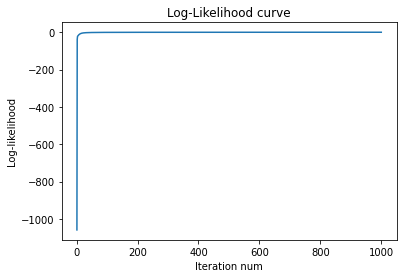

In [147]:
# Plot the loss curve
plt.plot([i+1 for i in range(len(model.likelihoods))], model.likelihoods)
plt.title("Log-Likelihood curve")
plt.xlabel("Iteration num")
plt.ylabel("Log-likelihood")
plt.show()

##### Let's calculate accuracy as well. Accuracy is defined simply as the rate of correct classifications.

In [149]:
#Make predictions on test data
y_pred = model.predict(X_test)

In [176]:
def accuracy(y_true,y_pred):
    '''Compute accuracy.
    Accuracy = (Correct prediction / number of samples)
    Args:
        y_true : Truth binary values (num_examples, )
        y_pred : Predicted binary values (num_examples, )
    Returns:
        accuracy: scalar value
    '''
    
    ### START CODE HERE
    count=0
    for i in range(len(y_true)):
      if(y_true[i]==y_pred[i]):
        count+=1
    accuracy = count/len(y_pred)
    ### END CODE HERE
    return accuracy

In [178]:
# Print accuracy on train data
accuracy(y_train,model.predict(X_train))

1.0

In [179]:
# Print accuracy on test data
accuracy(y_test,y_pred)

0.9705882352941176

## Part 1.2: Use Logistic Regression from sklearn on the same dataset

#### Tasks
- Define X and y again for sklearn Linear Regression model
- Train Logistic Regression Model on the training set (sklearn.linear_model.LogisticRegression class)
- Run the model on testing set
- Print 'accuracy' obtained on the testing dataset (sklearn.metrics.accuracy_score function)

#### Further fun (will not be evaluated)
- Compare accuracies of your model and sklearn's logistic regression model

#### Helpful links
- Classification metrics in sklearn: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
# Define X and y
X = 
y = 

In [ ]:
# Initialize the model from sklearn
model = 

In [ ]:
# Fit the model
model.fit(X_train, y_train)

In [ ]:
# Predict on testing set X_test
y_pred = 

In [ ]:
# Print Accuracy on testing set
test_accuracy_sklearn = 

print(f"\nAccuracy on testing set: {test_accuracy_sklearn}")